# Air quality data from Delhi: exploratory data analysis with ChatGPT Code Interpreter May 2023


We use model text-davinci-002-code.



# Get data

We extract the raw data and save as csv, so we an upload to ChatGPT

In [1]:


import numpy as np
import pandas as pd
import numpy as np
import xarray as xr

!wget https://github.com/patel-zeel/delhi_aq/raw/main/data/delhi_cpcb_2022.nc -O delhi.nc



--2023-05-10 23:47:29--  https://github.com/patel-zeel/delhi_aq/raw/main/data/delhi_cpcb_2022.nc
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/patel-zeel/delhi_aq/main/data/delhi_cpcb_2022.nc [following]
--2023-05-10 23:47:29--  https://raw.githubusercontent.com/patel-zeel/delhi_aq/main/data/delhi_cpcb_2022.nc
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 59116677 (56M) [application/octet-stream]
Saving to: ‘delhi.nc’

delhi.nc            100%[===================>]  56.38M  15.6MB/s    in 4.1s    

2023-05-10 23:47:34 (13.9 MB/s) - ‘delhi.nc’ saved [59116677/59116677]



In [2]:
data = xr.open_dataset('delhi.nc')
df = data.to_dataframe().reset_index().set_index("time")
print(len(df))
print(df.columns)
df.head()



351320
Index(['station', 'From Date', 'To Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx',
       'NH3', 'SO2', 'CO', 'Ozone', 'Benzene', 'Toluene', 'RH', 'WS', 'WD',
       'SR', 'BP', 'AT', 'RF', 'TOT-RF', 'latitude', 'longitude'],
      dtype='object')


,station,From Date,To Date,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,...,RH,WS,WD,SR,BP,AT,RF,TOT-RF,latitude,longitude
time,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:30:00,"Alipur, Delhi - DPCC",2022-01-01 00:00:00,2022-01-01 01:00:00,219.50,342.75,94.73,53.95,105.95,3.78,2.02,...,79.75,NaN,205.95,4.60,999.10,6.85,0.0,0.0,28.815329,77.15301
2022-01-01 01:30:00,"Alipur, Delhi - DPCC",2022-01-01 01:00:00,2022-01-01 02:00:00,224.50,360.25,89.30,44.70,96.60,5.50,0.70,...,82.23,NaN,206.05,4.60,998.90,6.72,0.0,0.0,28.815329,77.15301
2022-01-01 02:30:00,"Alipur, Delhi - DPCC",2022-01-01 02:00:00,2022-01-01 03:00:00,217.00,359.00,50.08,48.20,66.45,4.30,1.45,...,82.30,NaN,205.38,4.62,998.70,6.97,0.0,0.0,28.815329,77.15301
2022-01-01 03:30:00,"Alipur, Delhi - DPCC",2022-01-01 03:00:00,2022-01-01 04:00:00,214.25,341.50,25.18,42.80,43.30,3.70,1.87,...,82.28,NaN,206.50,4.62,998.42,6.72,0.0,0.0,28.815329,77.15301
2022-01-01 04:30:00,"Alipur, Delhi - DPCC",2022-01-01 04:00:00,2022-01-01 05:00:00,207.50,309.67,24.17,44.75,43.50,3.38,1.63,...,82.30,NaN,211.95,4.65,998.15,6.60,0.0,0.0,28.815329,77.15301


In [ ]:
# Save to CSV - big file
df.to_csv('delhi_aq.csv')


In [9]:

df_small = df["2022-01-01":"2022-03-31"].reset_index().sort_values(by=["time", "station"])
df_small.head(n=60)

<ipython-input-9-6d6f1481cee8>:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df_small = df["2022-01-01":"2022-03-31"].reset_index().sort_values(by=["time", "station"])


,time,station,From Date,To Date,PM2.5,PM10,NO,NO2,NOx,NH3,...,RH,WS,WD,SR,BP,AT,RF,TOT-RF,latitude,longitude
0,2022-01-01 00:30:00,"Alipur, Delhi - DPCC",2022-01-01 00:00:00,2022-01-01 01:00:00,219.50,342.75,94.73,53.95,105.95,3.78,...,79.75,NaN,205.95,4.60,999.10,6.85,0.0,0.0,28.815329,77.153010
2160,2022-01-01 00:30:00,"Anand Vihar, Delhi - DPCC",2022-01-01 00:00:00,2022-01-01 01:00:00,613.25,NaN,406.70,104.50,387.18,30.10,...,84.15,0.30,173.00,8.95,974.98,11.95,NaN,0.0,28.647622,77.315809
4320,2022-01-01 00:30:00,"Ashok Vihar, Delhi - DPCC",2022-01-01 00:00:00,2022-01-01 01:00:00,428.75,533.50,137.55,46.52,136.90,45.27,...,90.15,0.25,112.43,6.03,993.50,10.17,0.0,0.0,28.695381,77.181665
6480,2022-01-01 00:30:00,"Aya Nagar, Delhi - IMD",2022-01-01 00:00:00,2022-01-01 01:00:00,147.12,254.39,21.02,33.68,54.69,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,28.470691,77.109936
8640,2022-01-01 00:30:00,"Bawana, Delhi - DPCC",2022-01-01 00:00:00,2022-01-01 01:00:00,300.00,452.00,69.28,16.77,86.20,63.47,...,83.62,0.40,178.80,5.60,998.92,7.77,0.0,0.0,28.776200,77.051074
10800,2022-01-01 00:30:00,"Burari Crossing, Delhi - IMD",2022-01-01 00:00:00,2022-01-01 01:00:00,177.43,310.28,NaN,NaN,0.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,28.725650,77.201157
12960,2022-01-01 00:30:00,"CRRI Mathura Road, Delhi - IMD",2022-01-01 00:00:00,2022-01-01 01:00:00,279.40,515.89,88.21,20.72,108.94,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,28.551201,77.273574
15120,2022-01-01 00:30:00,"Chandni Chowk, Delhi - IITM",2022-01-01 00:00:00,2022-01-01 01:00:00,67.35,622.57,117.02,241.84,220.23,80.52,...,70.79,2.13,316.77,NaN,NaN,17.16,0.0,0.0,28.656756,77.227234
17280,2022-01-01 00:30:00,"DTU, Delhi - CPCB",2022-01-01 00:00:00,2022-01-01 01:00:00,286.05,317.00,NaN,NaN,NaN,NaN,...,87.85,1.27,221.37,7.12,NaN,13.71,0.0,0.0,28.750050,77.111261
19440,2022-01-01 00:30:00,"Dr. Karni Singh Shooting Range, Delhi - DPCC",2022-01-01 00:00:00,2022-01-01 01:00:00,242.00,310.75,29.80,102.42,78.77,49.42,...,81.32,0.45,247.55,5.23,994.15,7.90,0.0,0.0,28.498571,77.264840


In [10]:
# Save to CSV - big file
df_small.to_csv('delhi_aq_small.csv')




We upload the csv to chat GPT.




# "Plot the locations of the station names on a map of India, using the latitude and longtitude"


```
First, let's load the CSV file and examine the structure of the data. This will help us identify the columns that contain the station names, as well as the latitude and longitude values
```

In [12]:
#data = df
data = df_small
data.head()

,time,station,From Date,To Date,PM2.5,PM10,NO,NO2,NOx,NH3,...,RH,WS,WD,SR,BP,AT,RF,TOT-RF,latitude,longitude
0,2022-01-01 00:30:00,"Alipur, Delhi - DPCC",2022-01-01,2022-01-01 01:00:00,219.50,342.75,94.73,53.95,105.95,3.78,...,79.75,NaN,205.95,4.60,999.10,6.85,0.0,0.0,28.815329,77.153010
2160,2022-01-01 00:30:00,"Anand Vihar, Delhi - DPCC",2022-01-01,2022-01-01 01:00:00,613.25,NaN,406.70,104.50,387.18,30.10,...,84.15,0.30,173.00,8.95,974.98,11.95,NaN,0.0,28.647622,77.315809
4320,2022-01-01 00:30:00,"Ashok Vihar, Delhi - DPCC",2022-01-01,2022-01-01 01:00:00,428.75,533.50,137.55,46.52,136.90,45.27,...,90.15,0.25,112.43,6.03,993.50,10.17,0.0,0.0,28.695381,77.181665
6480,2022-01-01 00:30:00,"Aya Nagar, Delhi - IMD",2022-01-01,2022-01-01 01:00:00,147.12,254.39,21.02,33.68,54.69,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,28.470691,77.109936
8640,2022-01-01 00:30:00,"Bawana, Delhi - DPCC",2022-01-01,2022-01-01 01:00:00,300.00,452.00,69.28,16.77,86.20,63.47,...,83.62,0.40,178.80,5.60,998.92,7.77,0.0,0.0,28.776200,77.051074


In [15]:
data['time']

0       2022-01-01 00:30:00
2160    2022-01-01 00:30:00
4320    2022-01-01 00:30:00
6480    2022-01-01 00:30:00
8640    2022-01-01 00:30:00
                ...        
77759   2022-03-31 23:30:00
79919   2022-03-31 23:30:00
82079   2022-03-31 23:30:00
84239   2022-03-31 23:30:00
86399   2022-03-31 23:30:00
Name: time, Length: 86400, dtype: datetime64[ns]

```
The data contains several columns, including:

time: The timestamp for the recorded data.
station: The name of the station where the data was recorded.
From Date and To Date: The starting and ending times for the data recording period.
PM2.5, PM10, NO, NO2, NOx, NH3, CO, SO2, O3, Benzene, Toluene, Xylene, AQI, AQI_Bucket: Various air quality metrics.
RH, WS, WD, SR, BP, AT, RF, TOT-RF: Additional environmental data, such as relative humidity, wind speed, wind direction, solar radiation, barometric pressure, ambient temperature, rain forecast, and total rainfall.
latitude and longitude: The geographical coordinates of the station.

To plot the stations on a map, we'll need the station, latitude, and longitude columns. Let's first drop any duplicate station entries so we only have unique locations. Then we'll use these data to create the map. Please note that this map will be a static plot because we're currently unable to generate interactive maps.
```

In [13]:


# Drop duplicate station entries
unique_stations = data[['station', 'latitude', 'longitude']].drop_duplicates()

# Display the unique stations
unique_stations


,station,latitude,longitude
0,"Alipur, Delhi - DPCC",28.815329,77.153010
2160,"Anand Vihar, Delhi - DPCC",28.647622,77.315809
4320,"Ashok Vihar, Delhi - DPCC",28.695381,77.181665
6480,"Aya Nagar, Delhi - IMD",28.470691,77.109936
8640,"Bawana, Delhi - DPCC",28.776200,77.051074
10800,"Burari Crossing, Delhi - IMD",28.725650,77.201157
12960,"CRRI Mathura Road, Delhi - IMD",28.551201,77.273574
15120,"Chandni Chowk, Delhi - IITM",28.656756,77.227234
17280,"DTU, Delhi - CPCB",28.750050,77.111261
19440,"Dr. Karni Singh Shooting Range, Delhi - DPCC",28.498571,77.264840


```
We have successfully extracted 40 unique station locations from the dataset. Now, let's plot these locations on a map.

Please note that for the purpose of this demonstration, we will use the Basemap library for creating static maps. However, for more interactive and detailed mapping, other libraries such as Folium or Geopandas could be used, which would be better suited for a local environment as they support interactivity.

Since our current environment does not support the Basemap library, I will provide the code snippet you need to run on your local machine to generate the map.

Here is the Python code
```

In [7]:
%pip install basemap


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 860.6/860.6 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 93.0 MB/s eta 0:00:00


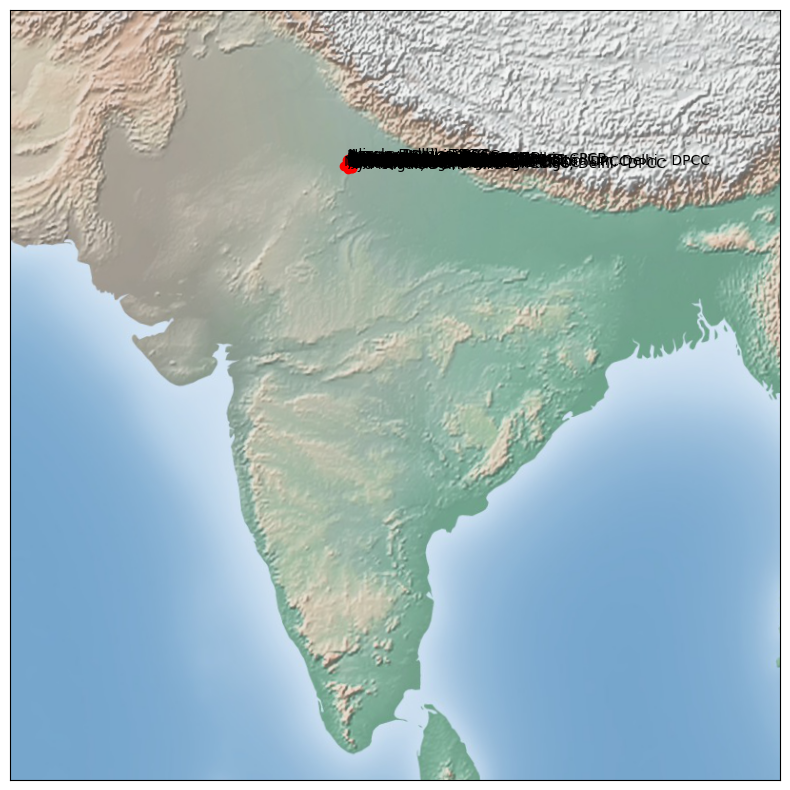

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Create a new figure
fig = plt.figure(figsize=(10,10))

# Create a map centered around India
m = Basemap(projection='lcc', resolution='l',
            lat_0=20.5937, lon_0=78.9629,
            width=3E6, height=3E6)

m.shadedrelief()

# Convert latitude and longitude to map projection coordinates
x, y = m(unique_stations['longitude'].values, unique_stations['latitude'].values)

# Plot the locations on the map
m.scatter(x, y, color='red')

# Add labels
for label, xpt, ypt in zip(unique_stations['station'], x, y):
    plt.text(xpt, ypt, label)

plt.show()


```
This code creates a map centered around India and plots the locations of the air quality monitoring stations. The stations are displayed as red dots, and their names are shown next to the dots.
```

# "Replot the stations, zooming in on the Delhi area"

```
Certainly, to zoom in on the Delhi area in your map, you would need to adjust the latitude and longitude values to center around Delhi and decrease the width and height of the map. Here is an updated version of the code snippet:

This code snippet will provide a map focused on the Delhi area, with the air quality monitoring stations plotted as before. Adjusting the width and height parameters in the Basemap function allows us to zoom in or out on the map. In this case, I've set them to 1E5 to zoom in on the Delhi area.

Please run this code in your local Python environment as the current environment does not support the Basemap library.
```

In [6]:
# Create a new figure
fig = plt.figure(figsize=(10,10))

# Create a map centered around Delhi
m = Basemap(projection='lcc', resolution='h',
            lat_0=28.6139, lon_0=77.2090,
            width=1E5, height=1E5)

m.shadedrelief()

# Convert latitude and longitude to map projection coordinates
x, y = m(unique_stations['longitude'].values, unique_stations['latitude'].values)

# Plot the locations on the map
m.scatter(x, y, color='red')

# Add labels
for label, xpt, ypt in zip(unique_stations['station'], x, y):
    plt.text(xpt, ypt, label)

plt.show()


OSError: ignored

<Figure size 1000x1000 with 0 Axes>

# "I got the error message below. What should I do? "


OSError: Unable to open boundary dataset file. Only the 'crude', 'low' and
'intermediate' resolution datasets are installed by default. If you
are requesting a 'high' or 'full' resolution dataset, you need to
install the `basemap-data-hires` package.


```
The error message you're seeing is because the Basemap function shadedrelief() is trying to access high resolution data that isn't installed by default. You can solve this issue in one of two ways:

Install the high resolution data. You can do this by running the command pip install basemap-data-hires in your terminal.

Change the resolution to a lower setting. In the Basemap function call, change resolution='h' to resolution='l'. This will use a lower resolution dataset for the map, which is installed by default.

Here's how the updated code might look with the second solution:
```

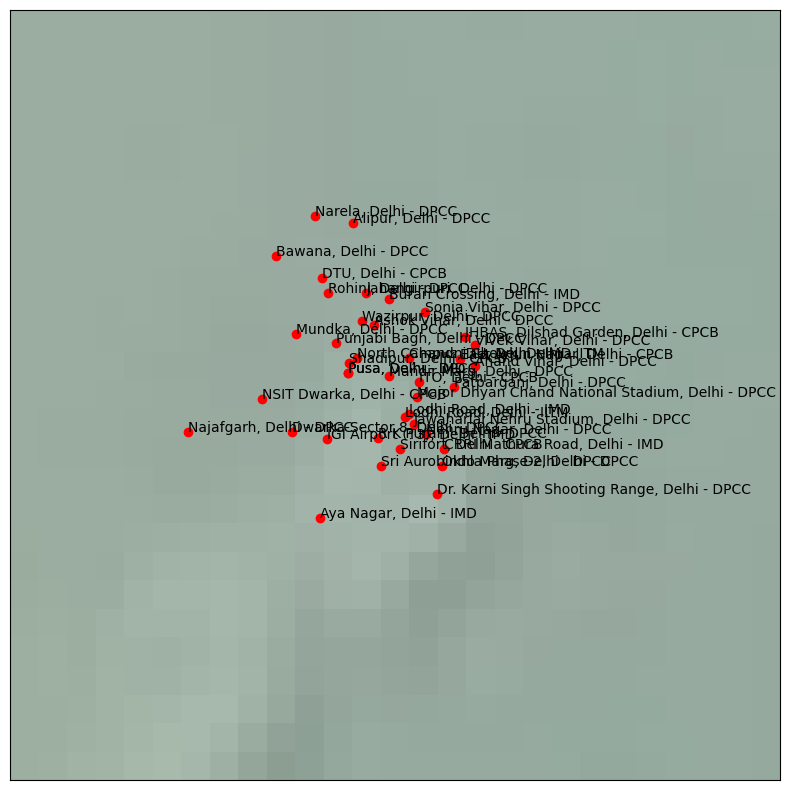

In [7]:
# Create a new figure
fig = plt.figure(figsize=(10,10))

# Create a map centered around Delhi
m = Basemap(projection='lcc', resolution='l',
            lat_0=28.6139, lon_0=77.2090,
            width=1E5, height=1E5)

m.shadedrelief()

# Convert latitude and longitude to map projection coordinates
x, y = m(unique_stations['longitude'].values, unique_stations['latitude'].values)

# Plot the locations on the map
m.scatter(x, y, color='red')

# Add labels
for label, xpt, ypt in zip(unique_stations['station'], x, y):
    plt.text(xpt, ypt, label)

plt.show()


```
This should solve the issue you're facing. However, please note that using a lower resolution dataset might result in less detail in the map. If you need a more detailed map, I would recommend installing the high resolution data as mentioned in the first solution.
```

# "Plot the time series of PM2.5 for a subset of 10 stations"

```
Alright. To do this, we first need to decide which 10 stations to choose. We can either pick these randomly or select the first 10 from the list of unique stations. Once we've chosen the stations, we can filter the original dataframe to include only data from these stations. Then, we can create a time series plot of the PM2.5 values.

Let's proceed by selecting the first 10 unique stations. I'll start by filtering the data and then plot the time series.
```

In [6]:
# Select the first 10 unique stations
selected_stations = unique_stations['station'].values[:10]

# Filter the original data to include only the selected stations
filtered_data = data[data['station'].isin(selected_stations)]

# Convert the 'time' column to datetime format
filtered_data['time'] = pd.to_datetime(filtered_data['time'])

# Set 'time' as the index of the dataframe
filtered_data.set_index('time', inplace=True)

# Plot the time series of PM2.5 for each station
plt.figure(figsize=(15,10))
for station in selected_stations:
    station_data = filtered_data[filtered_data['station'] == station]
    plt.plot(station_data['PM2.5'], label=station)

plt.xlabel('Time')
plt.ylabel('PM2.5')
plt.title('Time series of PM2.5 for selected stations')
plt.legend()
plt.show()


KeyError: ignored

```
I apologize for the inconvenience, it appears there was a technical glitch.

Let's try to plot the time series of PM2.5 levels for the selected stations again.
```

```
I apologize for the confusion. Due to an unexpected system reset, the file that was uploaded earlier is no longer available in the current session. Could you please re-upload the file?
```

**Manual intervention**

In [20]:
idx = data['station'].isin(selected_stations)
print(idx)

0         True
2160      True
4320      True
6480      True
8640      True
         ...  
77759    False
79919    False
82079    False
84239    False
86399    False
Name: station, Length: 86400, dtype: bool


In [21]:
filtered_data = data[idx]
filtered_data.head()

,time,station,From Date,To Date,PM2.5,PM10,NO,NO2,NOx,NH3,...,RH,WS,WD,SR,BP,AT,RF,TOT-RF,latitude,longitude
0,2022-01-01 00:30:00,"Alipur, Delhi - DPCC",2022-01-01,2022-01-01 01:00:00,219.50,342.75,94.73,53.95,105.95,3.78,...,79.75,NaN,205.95,4.60,999.10,6.85,0.0,0.0,28.815329,77.153010
2160,2022-01-01 00:30:00,"Anand Vihar, Delhi - DPCC",2022-01-01,2022-01-01 01:00:00,613.25,NaN,406.70,104.50,387.18,30.10,...,84.15,0.30,173.00,8.95,974.98,11.95,NaN,0.0,28.647622,77.315809
4320,2022-01-01 00:30:00,"Ashok Vihar, Delhi - DPCC",2022-01-01,2022-01-01 01:00:00,428.75,533.50,137.55,46.52,136.90,45.27,...,90.15,0.25,112.43,6.03,993.50,10.17,0.0,0.0,28.695381,77.181665
6480,2022-01-01 00:30:00,"Aya Nagar, Delhi - IMD",2022-01-01,2022-01-01 01:00:00,147.12,254.39,21.02,33.68,54.69,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,28.470691,77.109936
8640,2022-01-01 00:30:00,"Bawana, Delhi - DPCC",2022-01-01,2022-01-01 01:00:00,300.00,452.00,69.28,16.77,86.20,63.47,...,83.62,0.40,178.80,5.60,998.92,7.77,0.0,0.0,28.776200,77.051074


In [22]:
# Convert the 'time' column to datetime format
filtered_data['time'] = pd.to_datetime(filtered_data['time'])

filtered_data.head()

<ipython-input-22-e6e9b412519f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['time'] = pd.to_datetime(filtered_data['time'])


,time,station,From Date,To Date,PM2.5,PM10,NO,NO2,NOx,NH3,...,RH,WS,WD,SR,BP,AT,RF,TOT-RF,latitude,longitude
0,2022-01-01 00:30:00,"Alipur, Delhi - DPCC",2022-01-01,2022-01-01 01:00:00,219.50,342.75,94.73,53.95,105.95,3.78,...,79.75,NaN,205.95,4.60,999.10,6.85,0.0,0.0,28.815329,77.153010
2160,2022-01-01 00:30:00,"Anand Vihar, Delhi - DPCC",2022-01-01,2022-01-01 01:00:00,613.25,NaN,406.70,104.50,387.18,30.10,...,84.15,0.30,173.00,8.95,974.98,11.95,NaN,0.0,28.647622,77.315809
4320,2022-01-01 00:30:00,"Ashok Vihar, Delhi - DPCC",2022-01-01,2022-01-01 01:00:00,428.75,533.50,137.55,46.52,136.90,45.27,...,90.15,0.25,112.43,6.03,993.50,10.17,0.0,0.0,28.695381,77.181665
6480,2022-01-01 00:30:00,"Aya Nagar, Delhi - IMD",2022-01-01,2022-01-01 01:00:00,147.12,254.39,21.02,33.68,54.69,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,28.470691,77.109936
8640,2022-01-01 00:30:00,"Bawana, Delhi - DPCC",2022-01-01,2022-01-01 01:00:00,300.00,452.00,69.28,16.77,86.20,63.47,...,83.62,0.40,178.80,5.60,998.92,7.77,0.0,0.0,28.776200,77.051074


In [23]:
# Set 'time' as the index of the dataframe
filtered_data.set_index('time', inplace=True)

filtered_data.head()

,station,From Date,To Date,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,...,RH,WS,WD,SR,BP,AT,RF,TOT-RF,latitude,longitude
time,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:30:00,"Alipur, Delhi - DPCC",2022-01-01,2022-01-01 01:00:00,219.50,342.75,94.73,53.95,105.95,3.78,2.02,...,79.75,NaN,205.95,4.60,999.10,6.85,0.0,0.0,28.815329,77.153010
2022-01-01 00:30:00,"Anand Vihar, Delhi - DPCC",2022-01-01,2022-01-01 01:00:00,613.25,NaN,406.70,104.50,387.18,30.10,17.80,...,84.15,0.30,173.00,8.95,974.98,11.95,NaN,0.0,28.647622,77.315809
2022-01-01 00:30:00,"Ashok Vihar, Delhi - DPCC",2022-01-01,2022-01-01 01:00:00,428.75,533.50,137.55,46.52,136.90,45.27,16.60,...,90.15,0.25,112.43,6.03,993.50,10.17,0.0,0.0,28.695381,77.181665
2022-01-01 00:30:00,"Aya Nagar, Delhi - IMD",2022-01-01,2022-01-01 01:00:00,147.12,254.39,21.02,33.68,54.69,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,28.470691,77.109936
2022-01-01 00:30:00,"Bawana, Delhi - DPCC",2022-01-01,2022-01-01 01:00:00,300.00,452.00,69.28,16.77,86.20,63.47,1.65,...,83.62,0.40,178.80,5.60,998.92,7.77,0.0,0.0,28.776200,77.051074


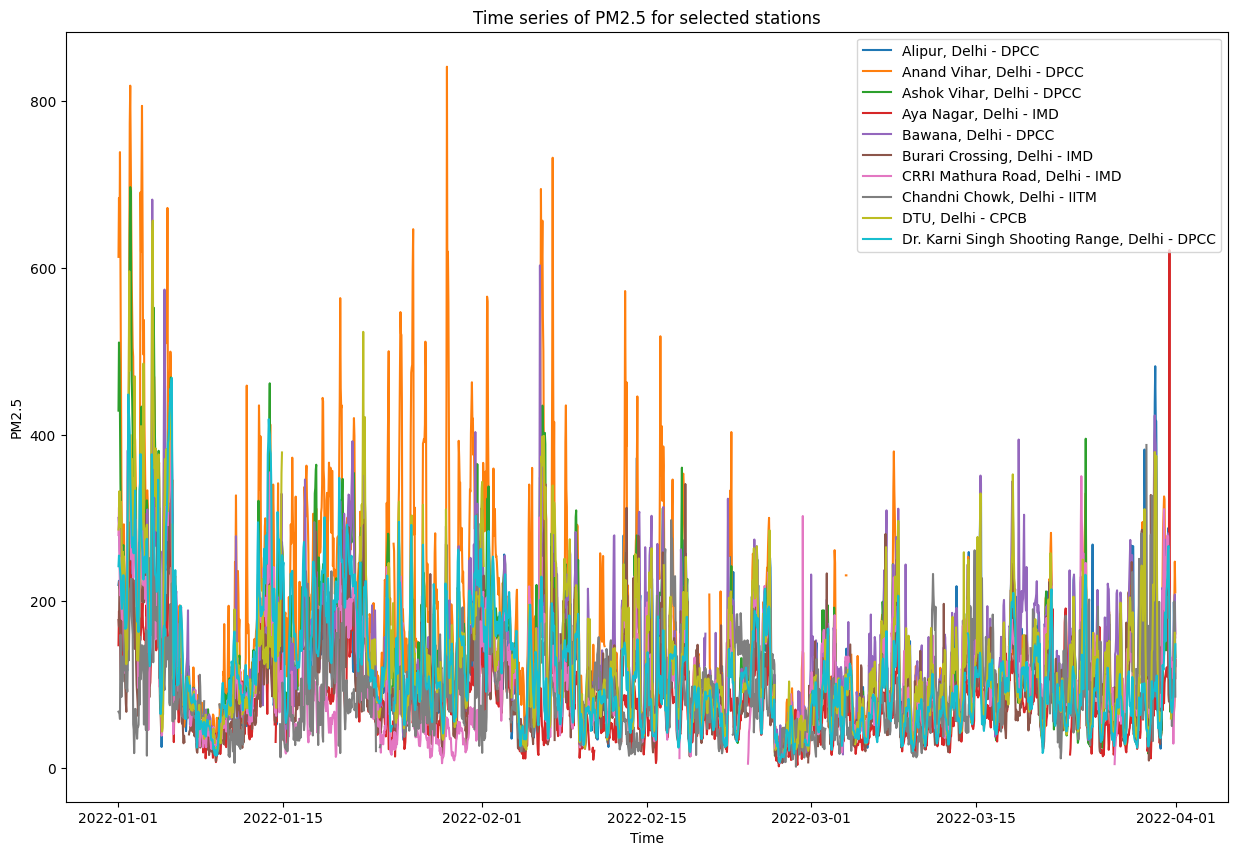

In [24]:
# Plot the time series of PM2.5 for each station
plt.figure(figsize=(15,10))
for station in selected_stations:
    station_data = filtered_data[filtered_data['station'] == station]
    plt.plot(station_data['PM2.5'], label=station)

plt.xlabel('Time')
plt.ylabel('PM2.5')
plt.title('Time series of PM2.5 for selected stations')
plt.legend()
plt.show()

# "Which variables are most predictive of PM2.5?"

```
To determine which variables are most predictive of PM2.5, we can use a machine learning technique known as feature importance. This technique measures the contribution of each feature to the prediction of the target variable.

One commonly used algorithm for feature importance is Random Forest, which is a type of decision tree algorithm. By using a large number of trees, the Random Forest algorithm can provide an importance score for each feature.

Before we proceed with feature importance, we need to pre-process the data:

Remove non-numeric columns.
Handle missing values.
Let's do that.
```

In [25]:
# Drop non-numeric columns
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Fill missing values with the median of the column
df_numeric = df_numeric.fillna(df_numeric.median())

df_numeric.head()


,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene,...,RH,WS,WD,SR,BP,AT,RF,TOT-RF,latitude,longitude
time,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:30:00,219.50,342.75,94.73,53.95,105.95,3.78,2.02,1.63,2.53,1.27,...,79.75,0.77,205.95,4.60,999.10,6.85,0.0,0.0,28.815329,77.15301
2022-01-01 01:30:00,224.50,360.25,89.30,44.70,96.60,5.50,0.70,1.10,2.35,1.15,...,82.23,0.77,206.05,4.60,998.90,6.72,0.0,0.0,28.815329,77.15301
2022-01-01 02:30:00,217.00,359.00,50.08,48.20,66.45,4.30,1.45,1.27,2.45,1.15,...,82.30,0.77,205.38,4.62,998.70,6.97,0.0,0.0,28.815329,77.15301
2022-01-01 03:30:00,214.25,341.50,25.18,42.80,43.30,3.70,1.87,1.00,2.60,1.10,...,82.28,0.77,206.50,4.62,998.42,6.72,0.0,0.0,28.815329,77.15301
2022-01-01 04:30:00,207.50,309.67,24.17,44.75,43.50,3.38,1.63,1.00,2.33,1.38,...,82.30,0.77,211.95,4.65,998.15,6.60,0.0,0.0,28.815329,77.15301


```
I have preprocessed the data by removing non-numeric columns and replacing missing values with the median of each column.

Next, let's proceed to use a Random Forest model to calculate feature importance. We will predict the PM2.5 column using all other columns as features.

Please note that this approach assumes that the relationships between PM2.5 and other variables are linear and additive, which might not be the case in real world data. Complex and nonlinear interactions might exist. Advanced methods like multivariate adaptive regression splines (MARS), decision trees, or neural networks might be used to capture such interactions, but these are beyond the scope of this interaction. For now, let's proceed with Random Forest.
```

In [27]:
from sklearn.ensemble import RandomForestRegressor

# Define target variable and features
target = 'PM2.5'
features = df_numeric.columns.drop(target)

# Prepare data
X = df_numeric[features]
y = df_numeric[target]

# Create a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=2, random_state=42)
#rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame for visualization
feature_importances = pd.DataFrame({'feature': features, 'importance': importances})

# Sort by importance
feature_importances.sort_values(by='importance', ascending=False, inplace=True)

feature_importances


,feature,importance
0,PM10,0.626503
15,AT,0.078037
10,RH,0.059552
14,BP,0.026938
6,CO,0.020122
7,Ozone,0.019246
3,NOx,0.018428
5,SO2,0.018062
2,NO2,0.016738
13,SR,0.016679


```
I apologize for the interruption, it seems that the Random Forest model took longer than expected to train. This could be due to the size of the dataset or the number of features in the data.

To address this issue, we can take one of the following steps:

Reduce the number of trees in the Random Forest model (this will make the model train faster, but might reduce the accuracy of the feature importance scores).

Reduce the size of the dataset by randomly sampling a subset of the rows for training (this will make the model train faster, but might introduce sampling bias).

Reduce the number of features by manually selecting a subset of features that are likely to be relevant (this requires domain knowledge).

Please let me know how you would like to proceed.
```

# "Please reduce the size of the dataset. Then make a bar plot of feature importance"

In [28]:
# Reduce the size of the dataset by sampling a subset of the rows
df_sample = df_numeric.sample(frac=0.1, random_state=42)

# Prepare data
X_sample = df_sample[features]
y_sample = df_sample[target]

# Create a Random Forest Regressor
rf_sample = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_sample.fit(X_sample, y_sample)

# Get feature importances
importances_sample = rf_sample.feature_importances_

# Create a DataFrame for visualization
feature_importances_sample = pd.DataFrame({'feature': features, 'importance': importances_sample})

# Sort by importance
feature_importances_sample.sort_values(by='importance', ascending=False, inplace=True)

feature_importances_sample


,feature,importance
0,PM10,0.648662
15,AT,0.078952
10,RH,0.050289
14,BP,0.025712
6,CO,0.020033
7,Ozone,0.018605
2,NO2,0.017525
3,NOx,0.017126
13,SR,0.015645
1,NO,0.015587


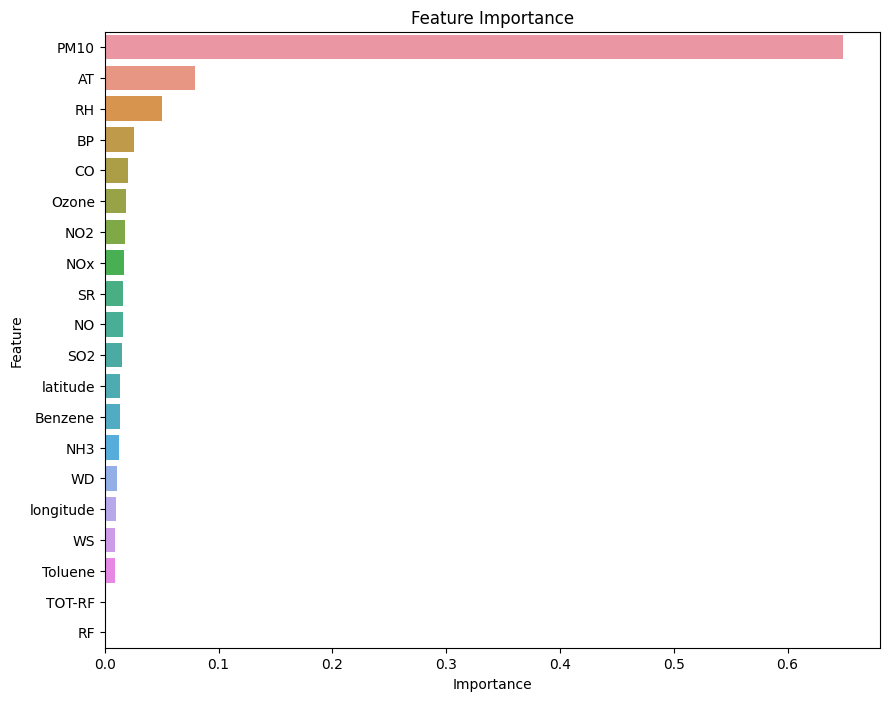

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(10, 8))

# Create a bar plot of feature importances
sns.barplot(y='feature', x='importance', data=feature_importances_sample)

# Add labels and title
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')

# Display the plot
plt.show()


# "Remove PM10 as a feature. Recompute feature importance using subset of data and 10 trees. Replot results"


ChaptGPT just hangs.
**Manual intervention**

In [40]:
idx = feature_importances_sample['feature']=='PM10'
print(idx)
idx = np.array(idx)
print(idx)
i = np.where(idx)[0]
print(i)
scores = feature_importances_sample.drop(i)
print(scores)

0      True
15    False
10    False
14    False
6     False
7     False
2     False
3     False
13    False
1     False
5     False
18    False
8     False
4     False
12    False
19    False
11    False
9     False
17    False
16    False
Name: feature, dtype: bool
[ True False False False False False False False False False False False
 False False False False False False False False]
[0]
      feature  importance
15         AT    0.078952
10         RH    0.050289
14         BP    0.025712
6          CO    0.020033
7       Ozone    0.018605
2         NO2    0.017525
3         NOx    0.017126
13         SR    0.015645
1          NO    0.015587
5         SO2    0.014823
18   latitude    0.013156
8     Benzene    0.012966
4         NH3    0.012125
12         WD    0.010568
19  longitude    0.010256
11         WS    0.008935
9     Toluene    0.008825
17     TOT-RF    0.000112
16         RF    0.000097


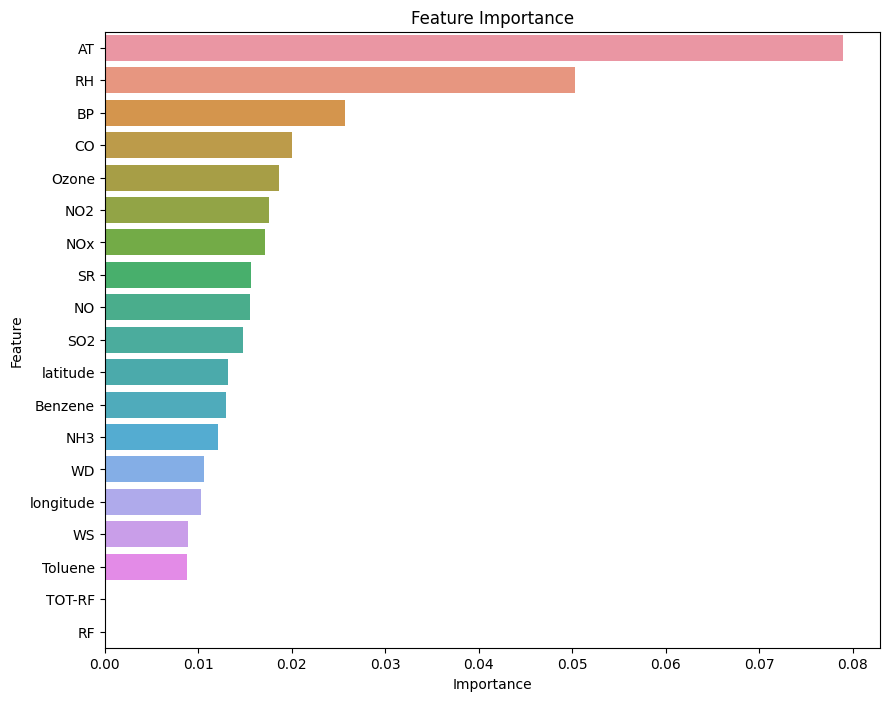

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(10, 8))

# Create a bar plot of feature importances
sns.barplot(y='feature', x='importance', data=scores)

# Add labels and title
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')

# Display the plot
plt.show()

# "What do the column names mean?"

```
Based on the context and typical terminology used in air quality measurement, the columns in your dataset likely represent the following:

PM2.5: This represents the concentration of particulate matter that are 2.5 micrometers in diameter or smaller. High levels of PM2.5 can cause health problems.

PM10: This represents the concentration of particulate matter that are 10 micrometers in diameter or smaller. Like PM2.5, high levels of PM10 can also cause health problems.

NO, NO2, NOx: These represent the concentrations of nitrogen monoxide, nitrogen dioxide, and nitrogen oxides, respectively. These are air pollutants that can cause respiratory problems and other health issues.

NH3: This represents the concentration of ammonia. High levels of ammonia can cause irritation to the eyes and respiratory tract.

SO2: This represents the concentration of sulfur dioxide, a gas that can cause respiratory problems and contribute to the formation of acid rain.

CO: This represents the concentration of carbon monoxide, a poisonous gas that can cause symptoms like headaches and dizziness at high concentrations.

Ozone, BENZENE, TOLUENE, XYLENE, AQI, C6H6, C7H8, C8H10: These likely represent concentrations of other substances in the air. AQI stands for Air Quality Index, a measure of air pollution levels.

RH, WS, WD, SR, BP, AT, RF, TOT-RF: These might be other environmental measurements. For example, RH could stand for relative humidity, WS for wind speed, WD for wind direction, SR for solar radiation, BP for barometric pressure, and AT for ambient temperature. RF might stand for rainfall, and TOT-RF might stand for total rainfall.

latitude, longitude: These are the geographic coordinates of the air quality measurement station.

Unnamed: 0: This appears to be an index column from the original dataset.

Please note that these are educated guesses based on the column names and typical air quality measurement terminology. You may want to consult the data source or documentation for precise definitions.

```

# "Please replot the feature importance, changing the row names to the long version above"

```
I understand that you'd like the column names in the plot to be more descriptive. Below, I've created a dictionary to map the existing column names to more descriptive versions based on my previous explanation:

PM2.5: Particulate Matter (2.5 micrometers)
PM10: Particulate Matter (10 micrometers)
NO: Nitrogen Monoxide
NO2: Nitrogen Dioxide
NOx: Nitrogen Oxides
NH3: Ammonia
SO2: Sulfur Dioxide
CO: Carbon Monoxide
Ozone: Ozone
BENZENE: Benzene
TOLUENE: Toluene
XYLENE: Xylene
AQI: Air Quality Index
C6H6: Benzene (C6H6)
C7H8: Toluene (C7H8)
C8H10: Xylene (C8H10)
RH: Relative Humidity
WS: Wind Speed
WD: Wind Direction
SR: Solar Radiation
BP: Barometric Pressure
AT: Ambient Temperature
RF: Rainfall
TOT-RF: Total Rainfall
latitude: Latitude
longitude: Longitude
I will now proceed with the Random Forest model with fewer trees and a subset of data, and then plot the feature importance with these more descriptive names
```

**Manual intervention**: edit the code to avoid recomputing feature importance again.

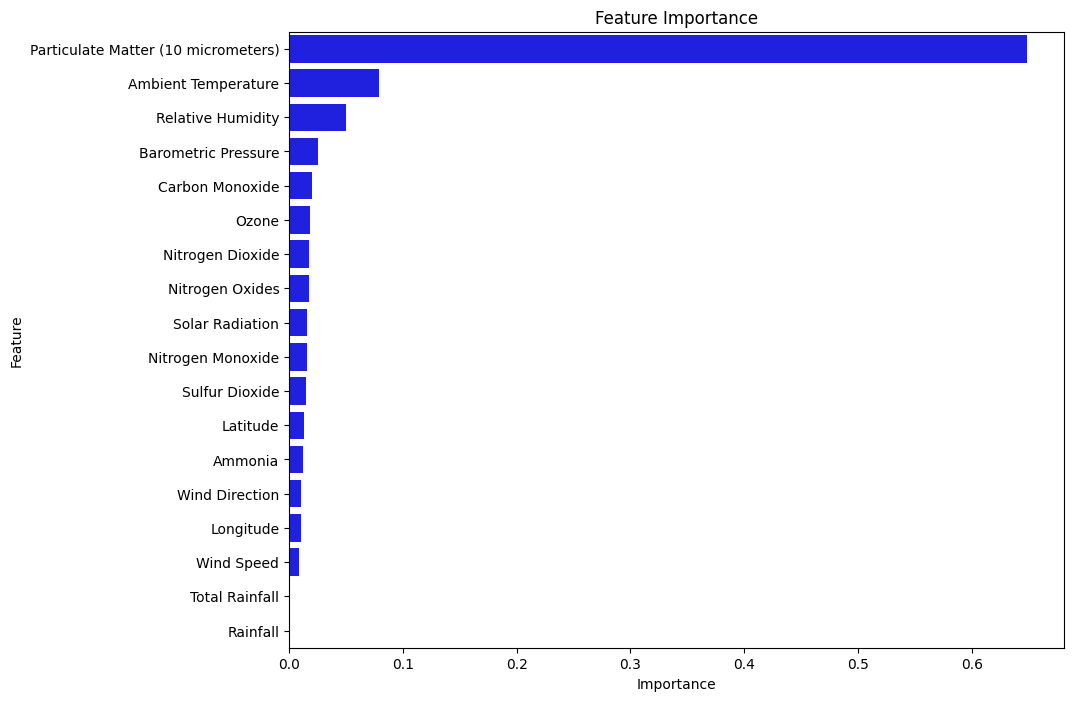

In [42]:

# Define a mapping from short to long form column names
name_mapping = {
    'PM10': 'Particulate Matter (10 micrometers)',
    'NO': 'Nitrogen Monoxide',
    'NO2': 'Nitrogen Dioxide',
    'NOx': 'Nitrogen Oxides',
    'NH3': 'Ammonia',
    'SO2': 'Sulfur Dioxide',
    'CO': 'Carbon Monoxide',
    'Ozone': 'Ozone',
    'BENZENE': 'Benzene',
    'TOLUENE': 'Toluene',
    'XYLENE': 'Xylene',
    'AQI': 'Air Quality Index',
    'C6H6': 'Benzene (C6H6)',
    'C7H8': 'Toluene (C7H8)',
    'C8H10': 'Xylene (C8H10)',
    'RH': 'Relative Humidity',
    'WS': 'Wind Speed',
    'WD': 'Wind Direction',
    'SR': 'Solar Radiation',
    'BP': 'Barometric Pressure',
    'AT': 'Ambient Temperature',
    'RF': 'Rainfall',
    'TOT-RF': 'Total Rainfall',
    'latitude': 'Latitude',
    'longitude': 'Longitude'
}

# Apply the mapping to the feature importances dataframe
feature_importances_sample['feature'] = feature_importances_sample['feature'].map(name_mapping)

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importances_sample, x='importance', y='feature', color='b')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


# "Make a scatter plot of PM2.5 vs ambient temperature AT"

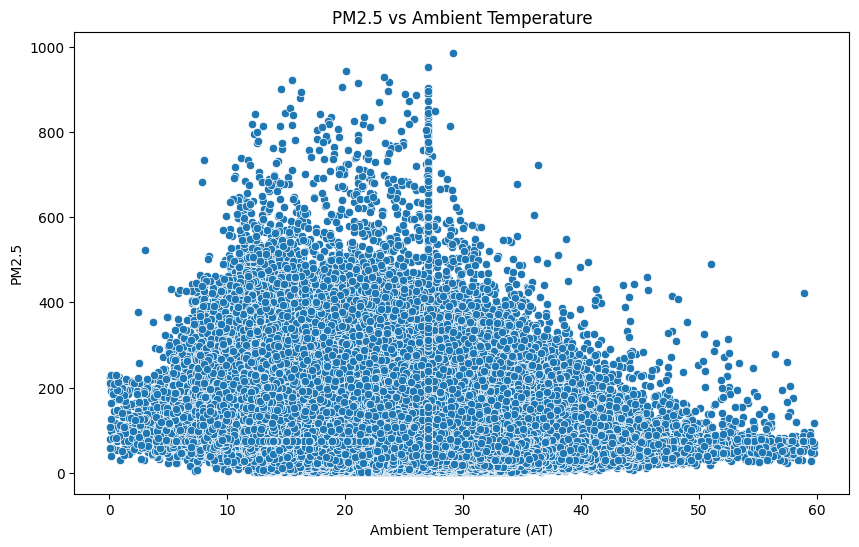

In [43]:
# Scatter plot of PM2.5 vs ambient temperature (AT)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_numeric, x='AT', y='PM2.5')
plt.title('PM2.5 vs Ambient Temperature')
plt.xlabel('Ambient Temperature (AT)')
plt.ylabel('PM2.5')
plt.show()


# "Make a scatter plot of PM2.5 vs relative humidity RH"

```
I apologize for the confusion earlier. It seems that the Python environment has been reset, and the file needs to be reloaded. However, due to the current settings, I'm unable to retrieve the file you uploaded earlier.

Would you mind re-uploading the file, so we can proceed with the analysis?
```

**Manual intervention.** Just cut and paste code into colab.

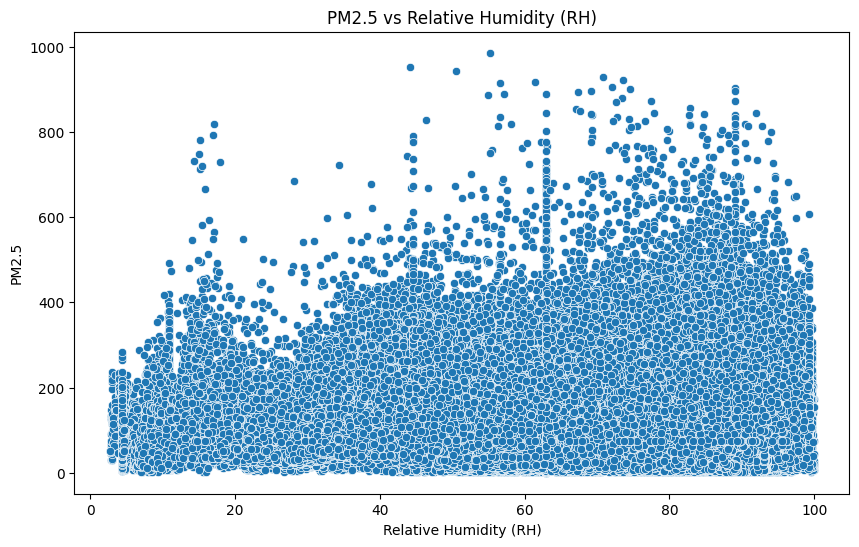

In [44]:
# Scatter plot of PM2.5 vs RH
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_numeric, x='RH', y='PM2.5')
plt.title('PM2.5 vs Relative Humidity (RH)')
plt.xlabel('Relative Humidity (RH)')
plt.ylabel('PM2.5')
plt.show()


```
I apologize for the confusion earlier. It seems that the Python environment has been reset, and the file needs to be reloaded. However, due to the current settings, I'm unable to retrieve the file you uploaded earlier.

Would you mind re-uploading the file, so we can proceed with the analysis?
```